In [9]:
import pandas as pd

def convert_to_three_decimal_places(input_str):
    try:
        # Convert string to float
        float_value = float(input_str)

        # Format float to three significant figures
        #formatted_value = "{:.3g}".format(float_value)

        formatted_value = round(float_value, 3)

        return float(formatted_value)
    except ValueError:
        print("Invalid input. Please enter a valid number.")


memtable_type = ["SkipList", "Vector", "Hash SkipList", "Hash Linklist"]
data_rows = []
E = [64, 128, 256, 1024]
for m_value in range(1,5):
    if m_value==2:
        continue
    #for E_value in E:
    for l_value in range(1,31):    
    #    outfile = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/outputs/E_varied/out_m_"+str(m_value)+"_E_"+str(E_value)+".txt"
        outfile = "./outputs/l_varied/out_m_"+str(m_value)+"_l_"+str(l_value)+".txt"
        
        f = open(outfile, "r")
        lines = f.readlines()
        counter = 0
        for line in lines:
            if line.startswith("Total time taken"):
                break
            counter+=1
        #print(lines[counter])
        array = []
        array.append(memtable_type[m_value-1])
        array.append(l_value)
        for i in range(counter, counter+7):
            #print(lines[i])
            line = lines[i].split(" ")
            time = line[-2]
            time = convert_to_three_decimal_places(time)
            array.append(time)
        #print(time_array)
        data_rows.append(array)
data_rows
# Define column names
column_names = ['Memtable Type','Pref Len Value', 'Total(s)', 'Time for inserts(s)', 'Time for queries(s)', 'Time for updates(s)', 'Time for deletes(s)', 'Time for range deletes(s)', 'Time for range queries']

# # Create an empty list to store arrays (data rows)
# data_rows = [
#     ['John', 25, 'New York'],
#     ['Alice', 30, 'Los Angeles'],
#     ['Bob', 22, 'Chicago']
# ]

# # Create DataFrame from the list of arrays
df = pd.DataFrame(data_rows, columns=column_names)

# # Display the resulting DataFrame
df


,Memtable Type,Pref Len Value,Total(s),Time for inserts(s),Time for queries(s),Time for updates(s),Time for deletes(s),Time for range deletes(s),Time for range queries
0,SkipList,1,5.449,2.398,0.200,2.728,0.0,0.0,0.0
1,SkipList,2,5.447,2.398,0.214,2.697,0.0,0.0,0.0
2,SkipList,3,5.451,2.401,0.200,2.711,0.0,0.0,0.0
3,SkipList,4,5.450,2.402,0.207,2.716,0.0,0.0,0.0
4,SkipList,5,5.446,2.415,0.191,2.723,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
85,Hash Linklist,26,5.441,2.474,0.090,2.790,0.0,0.0,0.0
86,Hash Linklist,27,5.440,2.448,0.086,2.813,0.0,0.0,0.0
87,Hash Linklist,28,5.436,2.441,0.088,2.815,0.0,0.0,0.0
88,Hash Linklist,29,5.439,2.444,0.085,2.816,0.0,0.0,0.0


In [7]:
outfile = "./outputs/l_varied/out_m_1_l_1.txt"
f = open(outfile,"r")
test=f.readlines()

In [13]:
#set(df["E Value"])
filtered_df = df[df['Memtable Type'] == 'Hash Linklist']
filtered_df

,Memtable Type,Pref Len Value,Total(s),Time for inserts(s),Time for queries(s),Time for updates(s),Time for deletes(s),Time for range deletes(s),Time for range queries
60,Hash Linklist,1,5.449,2.395,0.213,2.718,0.0,0.0,0.0
61,Hash Linklist,2,5.445,2.407,0.173,2.746,0.0,0.0,0.0
62,Hash Linklist,3,5.433,2.394,0.168,2.781,0.0,0.0,0.0
63,Hash Linklist,4,5.439,2.455,0.115,2.772,0.0,0.0,0.0
64,Hash Linklist,5,5.440,2.421,0.086,2.841,0.0,0.0,0.0
65,Hash Linklist,6,5.436,2.431,0.088,2.825,0.0,0.0,0.0
66,Hash Linklist,7,5.452,2.423,0.082,2.857,0.0,0.0,0.0
67,Hash Linklist,8,5.438,2.411,0.083,2.854,0.0,0.0,0.0
68,Hash Linklist,9,5.441,2.428,0.112,2.789,0.0,0.0,0.0
69,Hash Linklist,10,5.437,2.405,0.086,2.853,0.0,0.0,0.0


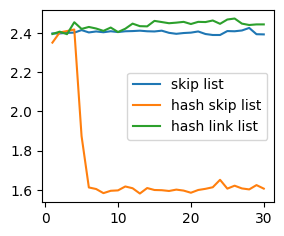

In [15]:
import matplotlib.pyplot as plt 
  
# create data 
#x = [10,20,30,40,50] 
#y = [30,30,30,30,30] 
#x = list(set(df["E Value"]))
#x = ['64', '128', '256', '1024']
x = [i for i in range(1,31)]
df_skiplist = df[df['Memtable Type'] == 'SkipList']
y1 = df_skiplist['Time for inserts(s)']  

# df_vector = df[df['Memtable Type'] == 'Vector']
# y2 = df_vector['Time for inserts(s)'] 

df_hash_skiplist = df[df['Memtable Type'] == 'Hash SkipList']
y3 = df_hash_skiplist['Time for inserts(s)'] 

df_hash_linklist = df[df['Memtable Type'] == 'Hash Linklist']
y4 = df_hash_linklist['Time for inserts(s)'] 

# plot lines 
plt.figure(figsize=(3,2.5))
#plt.plot(x, y1, label = "skip list", marker = 'o') 
plt.plot(x, y1, label = "skip list")
# plt.plot(x, y2, label = "vector", marker = 'x') 
#plt.plot(x, y3, label = "hash skip list", marker = 's') 
plt.plot(x, y3, label = "hash skip list")
#plt.plot(x, y4, label = "hash link list", marker = 'D')
plt.plot(x, y4, label = "hash link list")
#plt.plot(y, x, label = "line 2") 


plt.legend() 
plt.show()

In [18]:
def get_y_vals(Metric):
    df_skiplist = df[df['Memtable Type'] == 'SkipList']
    y1 = df_skiplist[Metric]  

    # df_vector = df[df['Memtable Type'] == 'Vector']
    # y2 = df_vector[Metric] 

    df_hash_skiplist = df[df['Memtable Type'] == 'Hash SkipList']
    y3 = df_hash_skiplist[Metric] 

    df_hash_linklist = df[df['Memtable Type'] == 'Hash Linklist']
    y4 = df_hash_linklist[Metric] 

    # return y1,y2,y3,y4
    return y1, y3,y4

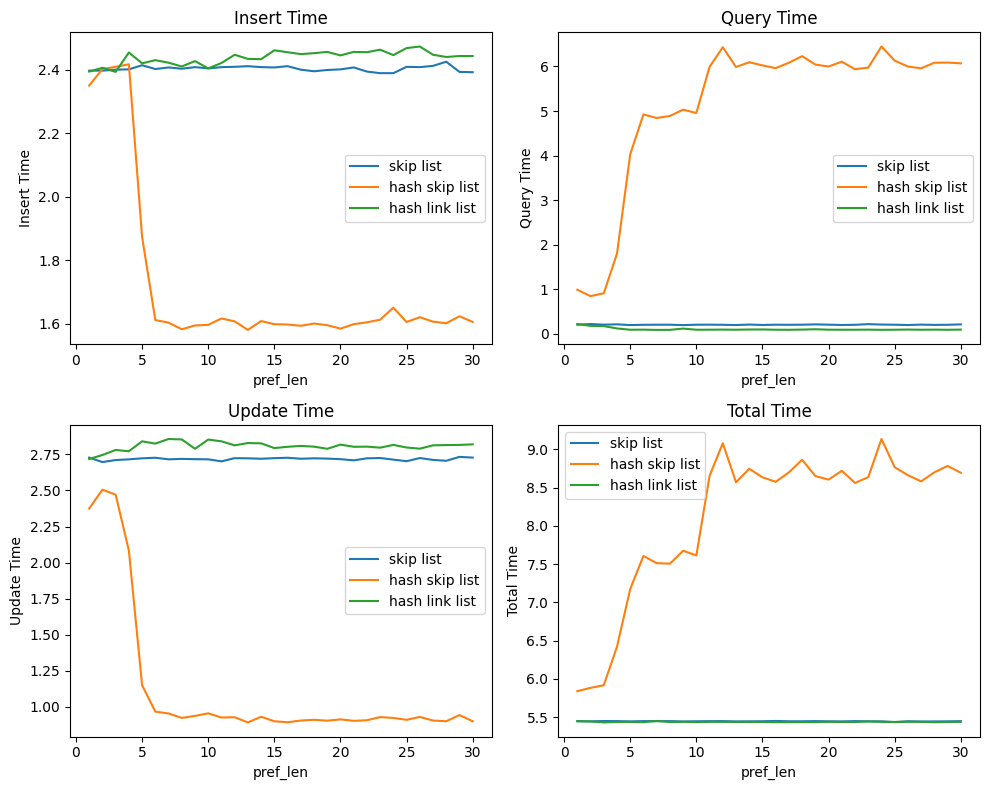

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import numpy as np


#x = ['64', '128', '256', '1024']
x = [i for i in range(1,31)]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot on the first subplot
# y1,y2,y3,y4 = get_y_vals('Time for inserts(s)')
y1,y3,y4 = get_y_vals('Time for inserts(s)')
# axes[0,0].plot(x, y1, label='skip list', marker ='o')
# axes[0,0].plot(x, y2, label = "vector", marker = 'x')
# axes[0,0].plot(x, y3, label='hash skip list', marker ='s')
# axes[0,0].plot(x, y4, label='hash link list', marker='D')

axes[0,0].plot(x, y1, label = "skip list")
axes[0,0].plot(x, y3, label = "hash skip list")
axes[0,0].plot(x, y4, label = "hash link list")
axes[0,0].set_title('Insert Time')
axes[0, 0].set_xlabel('pref_len')
axes[0, 0].set_ylabel('Insert Time')
axes[0,0].legend()

# Plot on the second subplot
#y1,y2,y3,y4 = get_y_vals('Time for queries(s)')
y1,y3,y4 = get_y_vals('Time for queries(s)')
# axes[0,1].plot(x, y1, label='skip list', marker ='o')
# axes[0,1].plot(x, y2, label = "vector", marker = 'x')
# axes[0,1].plot(x, y3, label='hash skip list', marker ='s')
# axes[0,1].plot(x, y4, label='hash link list', marker='D')

axes[0,1].plot(x, y1, label = "skip list")
axes[0,1].plot(x, y3, label = "hash skip list")
axes[0,1].plot(x, y4, label = "hash link list")
axes[0,1].set_title('Query Time')
axes[0, 1].set_xlabel('pref_len')
axes[0, 1].set_ylabel('Query Time')
axes[0,1].legend()

# Plot on the third subplot
#y1,y2,y3,y4 = get_y_vals('Time for updates(s)')
y1,y3,y4 = get_y_vals('Time for updates(s)')
# axes[1, 0].plot(x, y1, label='skip list', marker ='o')
# # axes[1, 0].plot(x, y2, label = "vector", marker = 'x')
# axes[1, 0].plot(x, y3, label='hash skip list', marker ='s')
# axes[1, 0].plot(x, y4, label='hash link list', marker='D')
axes[1,0].plot(x, y1, label = "skip list")
axes[1,0].plot(x, y3, label = "hash skip list")
axes[1,0].plot(x, y4, label = "hash link list")
axes[1, 0].set_title('Update Time')
axes[1, 0].set_xlabel('pref_len')
axes[1, 0].set_ylabel('Update Time')
axes[1, 0].legend()


# Plot on the fourth subplot
# y1,y2,y3,y4 = get_y_vals('Total(s)')
y1,y3,y4 = get_y_vals('Total(s)')
# axes[1, 1].plot(x, y1, label='skip list', marker ='o')
# # axes[1, 1].plot(x, y2, label = "vector", marker = 'x')
# axes[1, 1].plot(x, y3, label='hash skip list', marker ='s')
# axes[1, 1].plot(x, y4, label='hash link list', marker='D')
axes[1,1].plot(x, y1, label = "skip list")
axes[1,1].plot(x, y3, label = "hash skip list")
axes[1,1].plot(x, y4, label = "hash link list")
axes[1, 1].set_title('Total Time')
axes[1, 1].set_xlabel('pref_len')
axes[1, 1].set_ylabel('Total Time')
axes[1, 1].legend()

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

plt.savefig("E varied plots.png")


In [ ]:
#workload parameters: T, P,B,E,M, F, m, C
T = [10,12] #size ratio 
P = [1024, 2048 ,4096] # Buffer size in pages
B = [4,8,16] #entries_per_page 
E = [128, 256, 1024] #Entry size (B)
M = [8,16,32, 64] #Memory size (16 MB)
F = [64,128,256] #file size (KB)
m = [1,2,3,4] #memtable factory
C = [1,2,3,4] #compaction style
#./generate_workload.sh -I 10000 -U 3000 -Q 4000
    




In [ ]:
#Graph Plotting
